In [4]:
import pandas as pd
df = pd.read_csv("churn.csv")

In [2]:
# from pgmpy.models import BayesianNetwork

from pgmpy.base import DAG
model = DAG()
model.add_nodes_from(['diff', 'intel', 'grades'])
model.add_edges_from([('diff', 'grades'), ('intel', 'grades')])

In [1]:
from daft import PGM

In [9]:
list(df.columns)

['escore_credito',
 'pais',
 'genero',
 'idade',
 'tempo_consumidor',
 'dinheiro_em_conta',
 'compras_realizadas',
 'tem_cartao_de_credito',
 'conta_ativa',
 'salario',
 'deixou_o_banco']

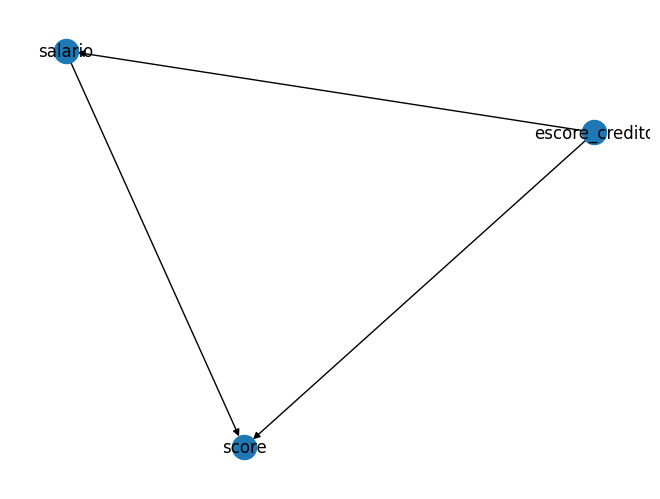

In [13]:
from pgmpy.models import BayesianNetwork
model = BayesianNetwork()
model.add_nodes_from(["escore_credito", "salario", "score"])
model.add_edges_from([("escore_credito", "salario"), ("salario", "score"), ("escore_credito", "score")])
import networkx as nx
import pylab as plt
nx_graph = nx.DiGraph(model.edges())
nx.draw(nx_graph, with_labels=True)
plt.show()

In [16]:
from pgmpy.inference import CausalInference
inference = CausalInference(model=model)

In [17]:
inference.get_all_backdoor_adjustment_sets("salario", "score")

frozenset({frozenset({'escore_credito'})})

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(random_state=42)